## Lego Data Analysis

#### importing necessary packages

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("lego_sets.csv")
themes = pd.read_csv("parent_themes.csv")

In [3]:
df.head()

,set_num,name,year,num_parts,theme_name,parent_theme
0,00-1,Weetabix Castle,1970,471.0,Castle,Legoland
1,0011-2,Town Mini-Figures,1978,NaN,Supplemental,Town
2,0011-3,Castle 2 for 1 Bonus Offer,1987,NaN,Lion Knights,Castle
3,0012-1,Space Mini-Figures,1979,12.0,Supplemental,Space
4,0013-1,Space Mini-Figures,1979,12.0,Supplemental,Space


In [4]:
themes

,id,name,is_licensed
0,1,Technic,False
1,22,Creator,False
2,50,Town,False
3,112,Racers,False
4,126,Space,False
...,...,...,...
106,605,Nexo Knights,False
107,606,Angry Birds,True
108,607,Ghostbusters,True
109,608,Disney,True


#### Find percentage of Star Wars themed releases among total number of licensed releases

In [5]:
# Drap Nan in set_num
df = df.dropna(subset=['set_num'])
df

,set_num,name,year,num_parts,theme_name,parent_theme
0,00-1,Weetabix Castle,1970,471.0,Castle,Legoland
1,0011-2,Town Mini-Figures,1978,NaN,Supplemental,Town
2,0011-3,Castle 2 for 1 Bonus Offer,1987,NaN,Lion Knights,Castle
3,0012-1,Space Mini-Figures,1979,12.0,Supplemental,Space
4,0013-1,Space Mini-Figures,1979,12.0,Supplemental,Space
...,...,...,...,...,...,...
11828,Wauwatosa-1,"LEGO Store Grand Opening Exclusive Set, Mayfai...",2012,15.0,LEGO Brand Store,LEGO Brand Store
11829,WHITEHOUSE-1,Micro White House,2015,NaN,Promotional,Promotional
11830,Wiesbaden-1,"LEGO Store Grand Opening Exclusive Set, Wiesba...",2010,146.0,LEGO Brand Store,LEGO Brand Store
11831,WishingWell-1,Wishing Well [Toys R Us Promo],2013,NaN,Friends,Friends


In [6]:
licensed_themes = themes[themes['is_licensed']]['name'].to_list()
licensed_themes

['Star Wars',
 'Harry Potter',
 'Pirates of the Caribbean',
 'Indiana Jones',
 'Cars',
 'Ben 10',
 'Prince of Persia',
 'SpongeBob SquarePants',
 'Toy Story',
 'Avatar',
 "Disney's Mickey Mouse",
 'Super Heroes',
 'The Hobbit and Lord of the Rings',
 'Teenage Mutant Ninja Turtles',
 'The Lone Ranger',
 'Minecraft',
 'Disney Princess',
 'Jurassic World',
 'Scooby-Doo',
 'Angry Birds',
 'Ghostbusters',
 'Disney']

In [7]:
df['is_licensed'] = ['Yes' if x in licensed_themes else 'No' for x in df['parent_theme']]
df

,set_num,name,year,num_parts,theme_name,parent_theme,is_licensed
0,00-1,Weetabix Castle,1970,471.0,Castle,Legoland,No
1,0011-2,Town Mini-Figures,1978,NaN,Supplemental,Town,No
2,0011-3,Castle 2 for 1 Bonus Offer,1987,NaN,Lion Knights,Castle,No
3,0012-1,Space Mini-Figures,1979,12.0,Supplemental,Space,No
4,0013-1,Space Mini-Figures,1979,12.0,Supplemental,Space,No
...,...,...,...,...,...,...,...
11828,Wauwatosa-1,"LEGO Store Grand Opening Exclusive Set, Mayfai...",2012,15.0,LEGO Brand Store,LEGO Brand Store,No
11829,WHITEHOUSE-1,Micro White House,2015,NaN,Promotional,Promotional,No
11830,Wiesbaden-1,"LEGO Store Grand Opening Exclusive Set, Wiesba...",2010,146.0,LEGO Brand Store,LEGO Brand Store,No
11831,WishingWell-1,Wishing Well [Toys R Us Promo],2013,NaN,Friends,Friends,No


In [8]:
tot_licensed = len(df[df['is_licensed']=='Yes'])
starwars_releases = len(df[df['parent_theme']=='Star Wars'])
starwars_percent = (starwars_releases / tot_licensed) * 100
print('Total licensed releases:',tot_licensed)
print('Starwars_releases:',starwars_releases)
print("Percentage of Star Wars themed releases among total number of licensed releases is: ", round(starwars_percent))

Total licensed releases: 1179
Starwars_releases: 609
Percentage of Star Wars themed releases among total number of licensed releases is:  52


In [9]:
licensed_releases = df[df['is_licensed']=='Yes']
sw_releases = df[df['parent_theme']=='Star Wars']

#### The year when star wars was defeated by other licensed theme

In [10]:
licensed_releases['count'] = 1
licensed_sorted = licensed_releases.sort_values('year')
licensed_sorted

C:\Users\bhara\AppData\Local\Temp\ipykernel_23912\808231221.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  licensed_releases['count'] = 1


,set_num,name,year,num_parts,theme_name,parent_theme,is_licensed,count
7837,7141-1,Naboo Fighter,1999,179.0,Star Wars Episode 1,Star Wars,Yes,1
7845,7150-1,TIE Fighter & Y-wing,1999,NaN,Star Wars Episode 4/5/6,Star Wars,Yes,1
7847,7151-1,Sith Infiltrator,1999,244.0,Star Wars Episode 1,Star Wars,Yes,1
7815,7131-1,Anakin's Podracer,1999,136.0,Star Wars Episode 1,Star Wars,Yes,1
7856,7161-1,Gungan Sub,1999,379.0,Star Wars Episode 1,Star Wars,Yes,1
...,...,...,...,...,...,...,...,...
7692,71017-2,Glam Metal Batman™,2017,NaN,Batman,Super Heroes,Yes,1
7691,71017-19,King Tut™,2017,NaN,Batman,Super Heroes,Yes,1
7690,71017-18,The Calculator™,2017,NaN,Batman,Super Heroes,Yes,1
7406,70902-1,Catwoman Catcycle Chase,2017,138.0,Batman,Super Heroes,Yes,1


In [20]:
summed_df = licensed_sorted.groupby(["year", "parent_theme"]).sum().reset_index()
summed_df.sort_values('count', ascending = False).drop_duplicates(['year'])


,year,parent_theme,num_parts,count
82,2017,Super Heroes,13123.0,72
76,2016,Star Wars,6934.0,61
67,2015,Star Wars,11410.0,58
59,2014,Star Wars,8293.0,45
47,2012,Star Wars,6769.0,43
32,2009,Star Wars,3953.0,39
52,2013,Star Wars,6159.0,35
9,2003,Star Wars,6660.0,32
42,2011,Star Wars,3451.0,32
36,2010,Star Wars,6003.0,30


In [18]:
print("On 2017 Super Heroes theme defeated Star Wars theme by releasing more sets")

On 2017 Super Heroes theme defeated Star Wars theme by releasing more sets


#### Draw a graph to compare top 3 licenced releases on year 2017

In [23]:
licensed_2017 = licensed_sorted[licensed_sorted['year'] == 2017]
df_tocompare = licensed_2017.groupby('parent_theme')[['count']].sum().reset_index().sort_values('count', ascending = False).head(3)
df_tocompare = df_tocompare.sort_values('count')

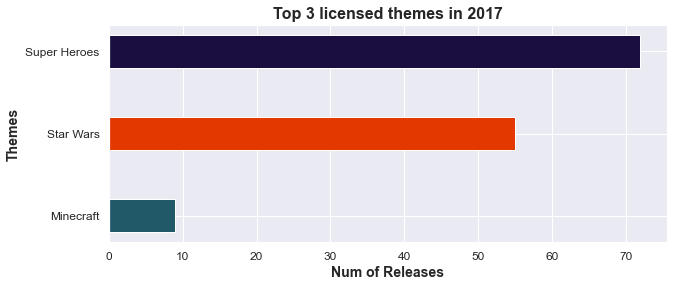

In [24]:
#plotting graph
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
plt.figure(figsize=(10,4))
legend = df_tocompare['parent_theme']
plt.barh(y = df_tocompare['parent_theme'], width = df_tocompare['count'], height = 0.4, color = ['#215968', '#e33900', '#1a0e41'])
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
plt.xlabel("Num of Releases", fontsize = 14, weight = 'bold')
plt.ylabel("Themes", fontsize = 14, weight = 'bold')
plt.title("Top 3 licensed themes in 2017", fontsize = 16, weight = 'bold')
plt.show()

#### Draw a graph to mark number of star wars releases by year

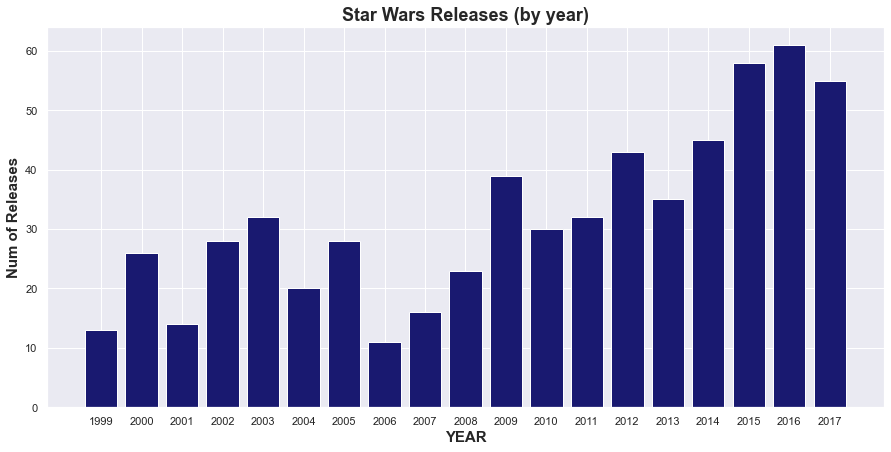

Star Wars Releases was most popular in: 2016
Star Wars Releases was least popular in: 2006


In [15]:
# plotting graph
release_by_yr = sw_releases.groupby('year')['set_num'].count().to_dict()
max_releases = max(release_by_yr, key = release_by_yr.get)
min_releases = min(release_by_yr, key = release_by_yr.get)
plt.figure(figsize=(15,7))
plt.bar(release_by_yr.keys(), release_by_yr.values(), color = 'midnightblue')
plt.xticks(list(release_by_yr.keys()))
plt.title("Star Wars Releases (by year)", fontsize = 18, weight="bold")
plt.xlabel("YEAR", fontsize = 15, weight="bold")
plt.ylabel("Num of Releases", fontsize = 15, weight="bold")
plt.show()

print('\033[1m'+'Star Wars Releases was most popular in:', max_releases)
print('\033[1m'+'Star Wars Releases was least popular in:', min_releases)
